**Should Travelers Avoid Flying Airlines That Have Had Crashes in the Past?**

Should we really be less inclined to fly airlines that have had fatal crashes in the past — even when the crashes don’t appear to be their fault? Or are crashes essentially random events that occur at about the same rate on all airlines over the long run? 

We can study this by looking at safety records for major commercial airlines over the past 30 years. The method is relatively simple. I’ll break the 30-year period down into two halves: first from 1985 to 1999, and then from 2000 to 2014. Then I’ll look to see whether there was a correlation in crash rates from one half of the data set to the other. If we identify a correlation, that will imply that crash risk is persistent — predictable to some extent based on the airline ?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
airline_safety = pd.read_csv('airline-safety.csv')
airline_safety.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


The dataset contains 56 entries of 8 features. Except for the 'airline' which is categorical, the remaining are integers

In [3]:
airline_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


The average incidents between 1985-1999 is 7, the average fatal accidents in those years is 2 and average fatalities is 112. The average incidents between 2000-2014 is 4 and the average fatal accidents in those years is less than 1 and average fatalities is 55

In [5]:
airline_safety.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


The different unique values of each features can be seen

In [8]:
airline_safety.nunique()

airline                   56
avail_seat_km_per_week    56
incidents_85_99           19
fatal_accidents_85_99     11
fatalities_85_99          38
incidents_00_14           14
fatal_accidents_00_14      4
fatalities_00_14          23
dtype: int64

No missing values in our dataset

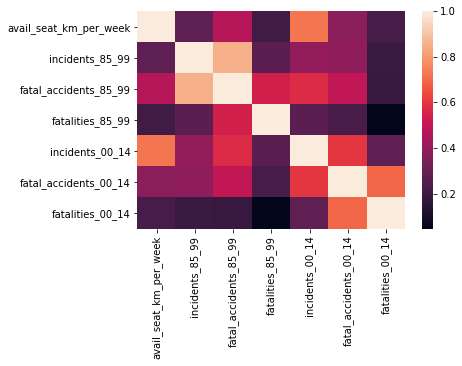

In [9]:
sns.heatmap(airline_safety.corr())

Visualization of all airines incidents, fatal accidents and fatalities from year 1985-1999.

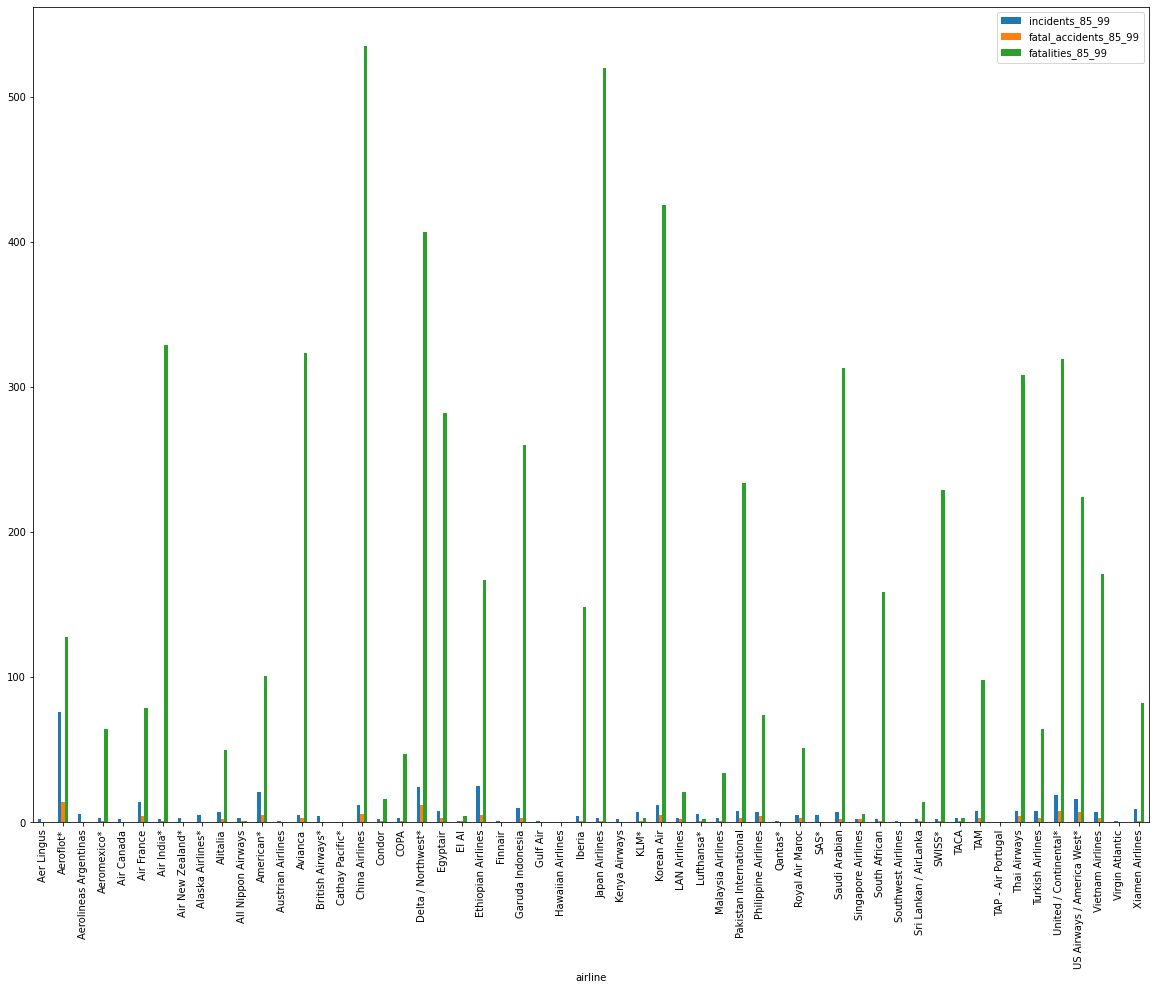

In [10]:
airline_safety.plot(x = 'airline',y=['incidents_85_99','fatal_accidents_85_99','fatalities_85_99'],kind='bar',figsize=(20,15));
plt.show()

Visualization of all airines incidents, fatal accidents and fatalities from year 2000-2014.

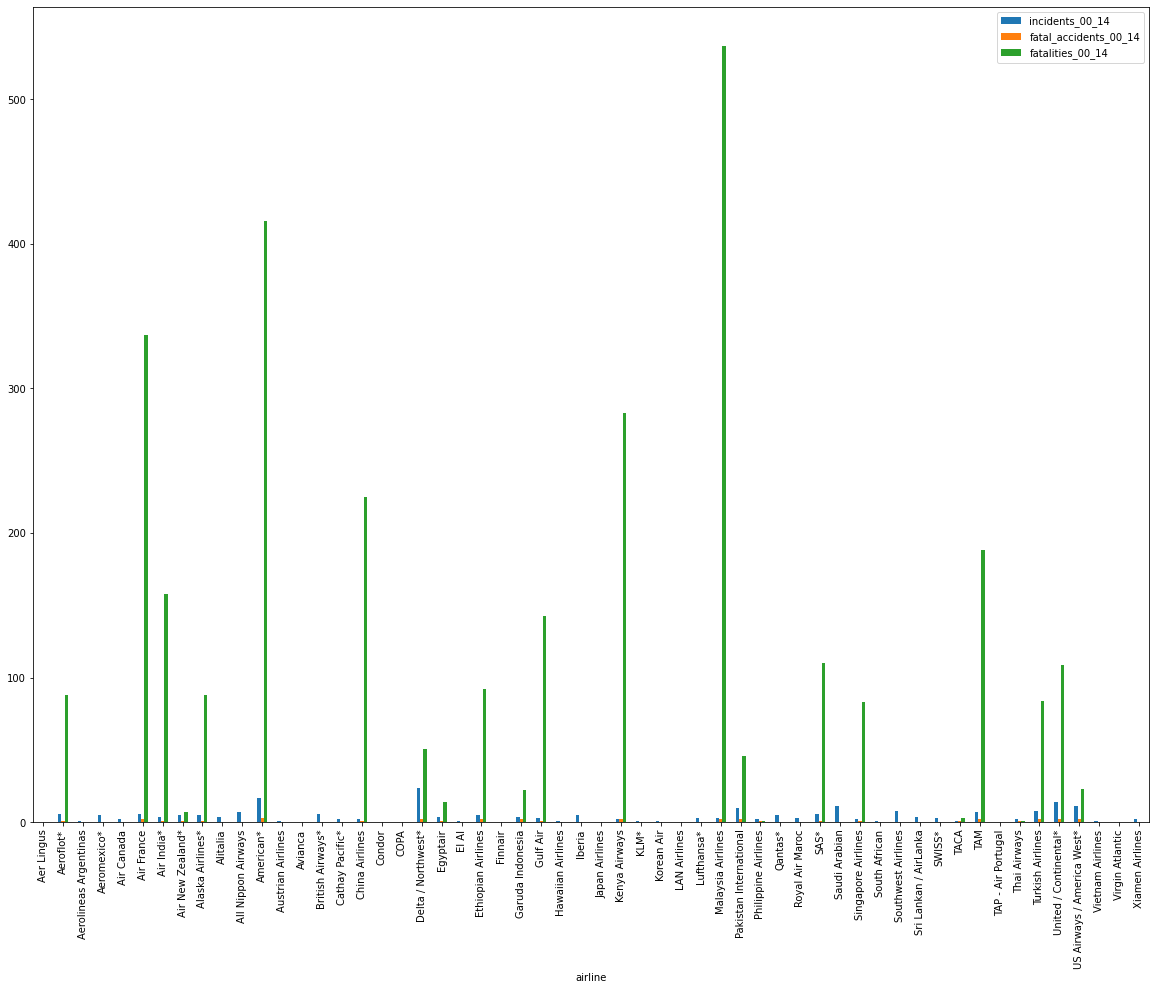

In [11]:
airline_safety.plot(x = 'airline',y=['incidents_00_14','fatal_accidents_00_14','fatalities_00_14'],kind='bar',figsize=(20,15));
plt.show()

The above plot was not much informative 
What else can be done ?
We can create range for incidents,fatal accidents and fatalities and compare values for them between 1985-1999 and 2000-2014

In [12]:
incidents8599 = pd.cut(airline_safety['incidents_85_99'],bins=[0,5,10,20,50,100],labels=['0-5','5-10','10-20','20-50','50-100'])
incidents0014 = pd.cut(airline_safety['incidents_00_14'],bins=[0,5,10,20,50,100],labels=['0-5','5-10','10-20','20-50','50-100'])

print("Incidents between 1985-1999\n",incidents8599.value_counts())
print("Incidents between 2000-2014\n",incidents0014.value_counts())

Incidents between 1985-1999
 0-5       30
5-10      14
10-20      5
20-50      3
50-100     1
Name: incidents_85_99, dtype: int64
Incidents between 2000-2014
 0-5       33
5-10       9
10-20      4
20-50      1
50-100     0
Name: incidents_00_14, dtype: int64


In [14]:
fatal_accidents8599 = pd.cut(airline_safety['fatal_accidents_85_99'],bins=[0,5,10,20,50,100],labels=['0-5','5-10','10-20','20-50','50-100'])
fatal_accidents0014 = pd.cut(airline_safety['fatal_accidents_00_14'],bins=[0,5,10,20,50,100],labels=['0-5','5-10','10-20','20-50','50-100'])

print("Fatal accidents between 1985-1999")
print(fatal_accidents8599.value_counts())
print("\nFatal accidents between 2000-2014")
print(fatal_accidents0014.value_counts())


Fatal accidents between 1985-1999
0-5       34
5-10       3
10-20      2
50-100     0
20-50      0
Name: fatal_accidents_85_99, dtype: int64

Fatal accidents between 2000-2014
0-5       24
50-100     0
20-50      0
10-20      0
5-10       0
Name: fatal_accidents_00_14, dtype: int64


In [15]:
fatalities8599 = pd.cut(airline_safety['fatalities_85_99'],bins=[0,25,50,100,200,500,800],labels=['0-25','25-50','50-100','100-200','200-500','500-800'])
fatalities0014 = pd.cut(airline_safety['fatalities_00_14'],bins=[0,25,50,100,200,500,800],labels=['0-25','25-50','50-100','100-200','200-500','500-800'])

print("Fatalities between 1985-1999")
print(fatalities8599.value_counts())
print("\nFatalities between 2000-2014")
print(fatalities0014.value_counts())

Fatalities between 1985-1999
200-500    12
0-25        9
50-100      7
100-200     6
25-50       3
500-800     2
Name: fatalities_85_99, dtype: int64

Fatalities between 2000-2014
0-25       7
50-100     6
100-200    5
200-500    4
500-800    1
25-50      1
Name: fatalities_00_14, dtype: int64


Max and Min values of Incidents, fatal incidents and fatalities for year 1985-1999

In [16]:
m = airline_safety['incidents_85_99'].max()
n = airline_safety['incidents_85_99'].min()

print("Airline with maximum incidents between 1985-1999")
print(airline_safety[airline_safety['incidents_85_99'] == m]['airline'].values)
print("\nAirline with minimum incidents between 1985-1999")
print(airline_safety[airline_safety['incidents_85_99'] == n]['airline'].values)
print('\n')


m = airline_safety['fatal_accidents_85_99'].max()
n = airline_safety['fatal_accidents_85_99'].min()

print("Airline with maximum fatal accidents between 1985-1999")
print(airline_safety[airline_safety['fatal_accidents_85_99'] == m]['airline'].values)
print("\nAirline with minimum fatal accidents between 1985-1999")
print(airline_safety[airline_safety['incidents_85_99'] == n]['airline'].values)
print('\n')


m = airline_safety['fatalities_85_99'].max()
n = airline_safety['fatalities_85_99'].min()

print("Airline with maximum fatalities between 1985-1999")
print(airline_safety[airline_safety['fatalities_85_99'] == m]['airline'].values)
print("\nAirline with minimum fatalities between 1985-1999")
print(airline_safety[airline_safety['fatalities_85_99'] == n]['airline'].values)
print('\n')

Airline with maximum incidents between 1985-1999
['Aeroflot*']

Airline with minimum incidents between 1985-1999
['Cathay Pacific*' 'Hawaiian Airlines' 'TAP - Air Portugal']


Airline with maximum fatal accidents between 1985-1999
['Aeroflot*']

Airline with minimum fatal accidents between 1985-1999
['Cathay Pacific*' 'Hawaiian Airlines' 'TAP - Air Portugal']


Airline with maximum fatalities between 1985-1999
['China Airlines']

Airline with minimum fatalities between 1985-1999
['Aer Lingus' 'Aerolineas Argentinas' 'Air Canada' 'Air New Zealand*'
 'Alaska Airlines*' 'Austrian Airlines' 'British Airways*'
 'Cathay Pacific*' 'Finnair' 'Gulf Air' 'Hawaiian Airlines'
 'Kenya Airways' 'Qantas*' 'SAS*' 'Southwest Airlines'
 'TAP - Air Portugal' 'Virgin Atlantic']




In [17]:
m = airline_safety['incidents_00_14'].max()
n = airline_safety['incidents_00_14'].min()

print("Airline with maximum incidents between 2000-2014")
print(airline_safety[airline_safety['incidents_00_14'] == m]['airline'].values)
print("\nAirline with minimum incidents between 2000-2014")
print(airline_safety[airline_safety['incidents_00_14'] == n]['airline'].values)
print('\n')


m = airline_safety['fatal_accidents_00_14'].max()
n = airline_safety['fatal_accidents_00_14'].min()

print("Airline with maximum fatal accidents between 2000-2014")
print(airline_safety[airline_safety['fatal_accidents_00_14'] == m]['airline'].values)
print("\nAirline with minimum fatal accidents between 2000-2014")
print(airline_safety[airline_safety['incidents_00_14'] == n]['airline'].values)
print('\n')


m = airline_safety['fatalities_00_14'].max()
n = airline_safety['fatalities_00_14'].min()

print("Airline with maximum fatalities between 2000-2014")
print(airline_safety[airline_safety['fatalities_00_14'] == m]['airline'].values)
print("\nAirline with minimum fatalities between 2000-2014")
print(airline_safety[airline_safety['fatalities_00_14'] == n]['airline'].values)
print('\n')

Airline with maximum incidents between 2000-2014
['Delta / Northwest*']

Airline with minimum incidents between 2000-2014
['Aer Lingus' 'Avianca' 'Condor' 'COPA' 'Finnair' 'Japan Airlines'
 'LAN Airlines' 'TAP - Air Portugal' 'Virgin Atlantic']


Airline with maximum fatal accidents between 2000-2014
['American*']

Airline with minimum fatal accidents between 2000-2014
['Aer Lingus' 'Avianca' 'Condor' 'COPA' 'Finnair' 'Japan Airlines'
 'LAN Airlines' 'TAP - Air Portugal' 'Virgin Atlantic']


Airline with maximum fatalities between 2000-2014
['Malaysia Airlines']

Airline with minimum fatalities between 2000-2014
['Aer Lingus' 'Aerolineas Argentinas' 'Aeromexico*' 'Air Canada'
 'Alitalia' 'All Nippon Airways' 'Austrian Airlines' 'Avianca'
 'British Airways*' 'Cathay Pacific*' 'Condor' 'COPA' 'El Al' 'Finnair'
 'Hawaiian Airlines' 'Iberia' 'Japan Airlines' 'KLM*' 'Korean Air'
 'LAN Airlines' 'Lufthansa*' 'Qantas*' 'Royal Air Maroc' 'Saudi Arabian'
 'South African' 'Southwest Airlines' 'S

Fatalities By Airline are Highly Unpredictable

As you should see, the number of fatalities is not very consistent from the first half of the data set to the next.There is no correlation in the rate of fatalities from one period to the next.



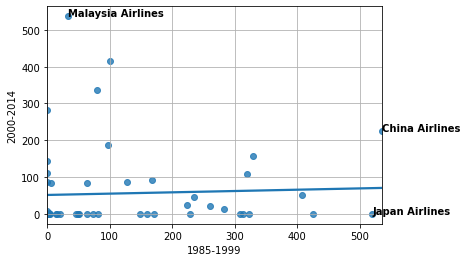

In [59]:
ax = sns.regplot(airline_safety['fatalities_85_99'], airline_safety['fatalities_00_14'], ci=None)
ax.grid()
ax.set_xlabel('1985-1999')
ax.set_ylabel('2000-2014')
for i in range(0,airline_safety.shape[0]):
  if(airline_safety['fatalities_85_99'][i]>450 or airline_safety['fatalities_00_14'][i]>500):
    ax.text(airline_safety['fatalities_85_99'][i]+0.2, airline_safety['fatalities_00_14'][i], airline_safety.airline[i], horizontalalignment='left', size='medium', color='black', weight='semibold')

Incidents By Airline are slightly predictable

Accidents that produce a massive number of fatalities are rare compared to fatal accidents of any kind, however. And fatal accidents represent only about one-quarter of all incidents listed in the database. So it may be better to compare airlines on the basis of their number of incidents, whether or not they resulted in a fatality, which has the effect of increasing the sample size.

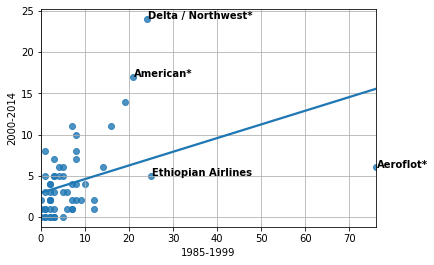

In [61]:
ax = sns.regplot(airline_safety['incidents_85_99'], airline_safety['incidents_00_14'], ci=None)
ax.grid()
ax.set_xlabel('1985-1999')
ax.set_ylabel('2000-2014')
for i in range(0,airline_safety.shape[0]):
  if(airline_safety['incidents_85_99'][i]>20 or airline_safety['incidents_00_14'][i]>20):
    ax.text(airline_safety['incidents_85_99'][i]+0.2, airline_safety['incidents_00_14'][i], airline_safety.airline[i], horizontalalignment='left', size='medium', color='black', weight='semibold')

Viewed this way, there is a modest correlation from one period to the next.There are also a few major outliers in the chart: three are Delta , American and Ethiopian Airlines, which have had a persistently high rate of incidents. A third outlier, Aeroflot, had an extraordinarily high number of reported incidents in the 1990s. There is still a positive correlation even if those four airlines are excluded, however, which rates as modestly statistically significant — some airlines are slightly safer to fly than others.



Our preliminary answer, then, is that an airline’s track record tells you something about its probability of future crashes — although not a lot, and only if looked at in the right way. In particular, you should look toward an airline’s rate of dangerous incidents of any kind rather than its number of fatalities or fatal accidents. These near-misses are more consistent from period to period — and could result in a deadly crash the next time around.

Let’s combine our three measures of crash rates — incidents, fatal accidents and fatalities — into a single measure which I’ll call the airline’s safety score

In [72]:
incidents_safety_score_85_99 =(airline_safety['incidents_85_99'] - airline_safety['incidents_85_99'].mean())/airline_safety['incidents_85_99'].std(ddof=0)
fatal_accident_safety_score_85_99 = (airline_safety['fatal_accidents_85_99'] - airline_safety['fatal_accidents_85_99'].mean())/airline_safety['fatal_accidents_85_99'].std(ddof=0)
fatalities_accident_safety_score_85_99 = (airline_safety['fatalities_85_99'] - airline_safety['fatalities_85_99'].mean())/airline_safety['fatalities_85_99'].std(ddof=0)
airline_safety['safety_score_85_99'] = (incidents_safety_score_85_99 + fatal_accident_safety_score_85_99 + fatalities_accident_safety_score_85_99)/3



In [74]:
incidents_safety_score_00_14 =(airline_safety['incidents_00_14'] - airline_safety['incidents_00_14'].mean())/airline_safety['incidents_00_14'].std(ddof=0)
fatal_accident_safety_score_00_14 = (airline_safety['fatal_accidents_00_14'] - airline_safety['fatal_accidents_00_14'].mean())/airline_safety['fatal_accidents_00_14'].std(ddof=0)
fatalities_accident_safety_score_00_14 = (airline_safety['fatalities_00_14'] - airline_safety['fatalities_00_14'].mean())/airline_safety['fatalities_00_14'].std(ddof=0)
airline_safety['safety_score_00_14'] = (incidents_safety_score_00_14 + fatal_accident_safety_score_00_14 + fatalities_accident_safety_score_00_14)/3



In [69]:
airline_safety['combined_safety_score']=airline_safety['safety_score_85_99'] + airline_safety['safety_score_00_14']

In [71]:
cm = sns.light_palette("green", as_cmap=True)

s = airline_safety[['airline','safety_score_85_99','safety_score_00_14','combined_safety_score']].style.background_gradient(cmap=cm)
s

,airline,safety_score_85_99,safety_score_00_14,combined_safety_score
0,Aer Lingus,-0.671698,-0.731801,-1.403498
1,Aeroflot*,3.523056,0.369791,3.892847
2,Aerolineas Argentinas,-0.549784,-0.657796,-1.207580
3,Aeromexico*,-0.376912,-0.361777,-0.738689
4,Air Canada,-0.671698,-0.583791,-1.255489
5,Air France,0.345428,1.513755,1.859183
6,Air India*,0.200231,0.433260,0.633492
7,Air New Zealand*,-0.641219,0.051075,-0.590144
8,Alaska Airlines*,-0.580262,0.295786,-0.284476
9,Alitalia,-0.169538,-0.435781,-0.605319


Positive scores indicate a safe track record — Delat/Northwest, for instance, has a safety score of +4.32. By contrast, Australian Airlines has a score of -1.35.